This is a jupyter notebook that integrates Heinrich Schwabe's data into the database. The data is got fromt [the site](https://www.aip.de/Members/rarlt/sunspots/schwabe) . It's in [the paper](https://www.aip.de/Members/rarlt/sunspots/schwabe/paper-schwabe-data) that we find the data.

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from graphs_helper import *
import db_connection
import db_transfers

In [2]:
# read the data file and sort the contents
f = open("data_other_sources/schwabe_v1.3_20150812.txt","r")
sod = [line for line in f.readlines()]
# sod stands form Schwabe Original Drawing/Data
columns = sod[0].split()
sod = [d.split() for d in sod[2:]]
newsod = []

for d in sod:
    if len(d)==22:
        newsod.append([int(d[0]),int(d[1]),int(d[2]),int(d[3]),int(d[4]),d[5],d[6],d[7],d[8],d[9],d[10],d[11],d[12],d[13],d[14],d[15],d[16],d[17],d[18],d[19],d[20],d[21]])
    elif len(d)==20:
        # i hope i'm getting all the 20's right...
        newsod.append([int(d[0]),int(d[1]),int(d[2]),int(d[3]),int(d[4]),d[5],d[6],d[7],d[8],d[9],d[10],d[11],d[12],d[13],None,None,d[14],d[15],d[16],d[17],d[18],d[19]])
    elif len(d)==21:
        # here there isn't an 'A' column
        newsod.append([int(d[0]),int(d[1]),int(d[2]),int(d[3]),int(d[4]),d[5],d[6],d[7],d[8],d[9],d[10],d[11],d[12],d[13],d[14],d[15],d[16],d[17],d[18],d[19],d[20],None])
    else:
        print("data has wierd length")
        raise Exception

sod=newsod[:] # this works, evrything is going well :)
        
f.close()

In [6]:
# transforms data into date, sunspots, groups etc.
data_dic = {}

# originally write it so that for each key = date there is
# value = [(group,measurer),(group,measurer),...]
for d in sod:
    date = dt.date(d[0],d[1],d[2])
    group = d[14] # can be none
    measurer = d[15]
    try: data_dic[date].append((group,measurer))
    except: data_dic[date] = [(group,measurer)]
    
# now make it so that key=date, value = (groups,sunspots,wolf,measurers,)
for k in data_dic:
    g=0
    s=0
    groups=[]
    measurers=""
    for d in data_dic[k]:
        s+=1
        measurer = d[1]
        if measurer:
            if measurer not in measurers:
                measurers+=measurer
        group=d[0]
        if group != None:
            if group not in groups:
                groups.append(group)
                g+=1
        else: 
            g+=1
            measurers += "no group id"# usually this means lonely sunspot
    # redefine the dictionary
    data_dic[k] = (g,s,10*g+s,measurers)



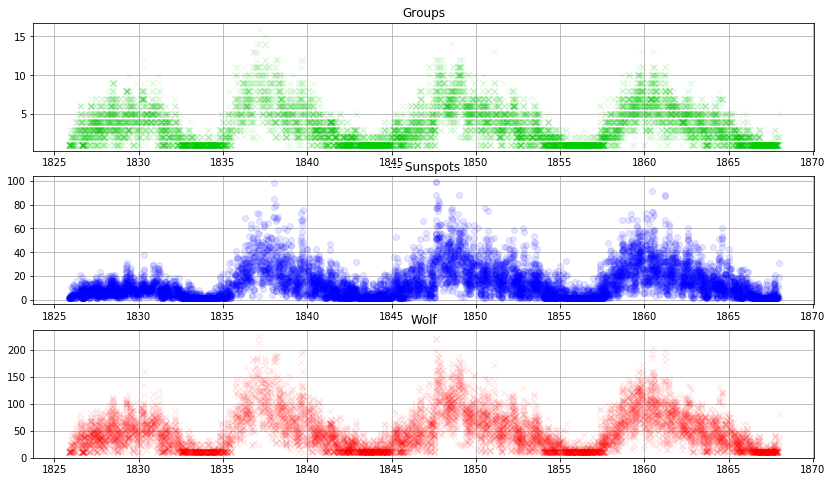

In [7]:
# plot to see if all is good (it's perfect, hurray!)
x = [k for k in data_dic]
groups = [data_dic[k][0] for k in data_dic]
sunspots = [data_dic[k][1] for k in data_dic]
wolf = [data_dic[k][2] for k in data_dic]

plt.figure(figsize=(14,8))
plt.subplot(311)
plt.plot(x,groups,"x",label="groups",color=(0,0.8,0,0.1))
plt.title("Groups")
plt.grid()

plt.subplot(312)
plt.plot(x,sunspots,"o",label="sunspots",color = (0,0,1,0.1))
plt.title("--- Sunspots")
plt.grid()

plt.subplot(313)
plt.plot(x,wolf,"x",label="wolf",color=(1,0,0,0.1))
plt.title("Wolf")
plt.grid()

plt.savefig("figures/Schwabe-Drawing.png")
plt.show()

In [8]:
# run only once!

"""
# add the data to DATA SILSO HISTO database
cursor,mydb = db_connection.database_connector(the_database="DATA_SILSO_HISTO")

for k in data_dic:
    g,s,w,comment = data_dic[k][0],data_dic[k][1],data_dic[k][2],data_dic[k][3]
    query = "INSERT INTO DATA SET DATE='"+str(k)+"',FK_OBSERVERS=197,GROUPS="+str(g)+","
    query += "SUNSPOTS="+str(s)+",WOLF="+str(w)+",COMMENT='"+comment+"',FLAG=0,"
    query += "DATE_INSERT='"+str(dt.datetime.now())[:19]+"'"
    cursor.execute(query,())
    
mydb.commit()

db_connection.close_database_connection(mydb)
"""


mysql connection successfully established with DATA_SILSO_HISTO
Closing MySQL connection...


In [2]:
# run only once

"""
# transfer it also to GOOD DATA SILSO
cursor,mydb = db_connection.database_connector(the_database="DATA_SILSO_HISTO")
cursor2,mydb2 = db_connection.database_connector(the_database="GOOD_DATA_SILSO")
query = "SELECT ID FROM DATA WHERE FK_OBSERVERS=197"
cursor.execute(query,())
ids = cursor.fetchall()
for i in ids:
    db_transfers.db_transfer(id_number=i[0],sender="DATA_SILSO_HISTO",recipient="GOOD_DATA_SILSO",
                             cursor=cursor,mydb=mydb,cursor2=cursor2,mydb2=mydb2,close_connections=False,
                             dont_delete=True)

db_connection.close_database_connection(mydb2)
db_connection.close_database_connection(mydb)
"""


mysql connection successfully established with DATA_SILSO_HISTO

mysql connection successfully established with GOOD_DATA_SILSO
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetche

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
succes

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a

Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data added to database
successfully fetched data from DATA_SILSO_HISTO
Data a